In [2]:
import matplotlib.pyplot as plt

In [3]:
i = plt.imread('apssssss.png')
i

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       ...,

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]], dtype=float32)

In [4]:
i.shape

(225, 225, 3)

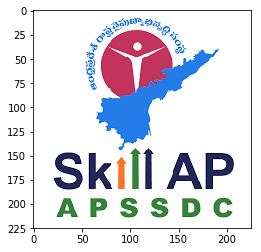

In [5]:
plt.imshow(i)

In [10]:
import numpy as np
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784',version = 1,cache = True)

In [11]:
mnist.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'details', 'categories', 'url'])

In [12]:
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [13]:
mnist.details

{'id': '554',
 'name': 'mnist_784',
 'version': '1',
 'format': 'ARFF',
 'upload_date': '2014-09-29T03:28:38',
 'licence': 'Public',
 'url': 'https://www.openml.org/data/v1/download/52667/mnist_784.arff',
 'file_id': '52667',
 'default_target_attribute': 'class',
 'tag': ['AzurePilot',
  'OpenML-CC18',
  'OpenML100',
  'study_1',
  'study_123',
  'study_41',
  'study_99',
  'vision'],
 'visibility': 'public',
 'status': 'active',
 'processing_date': '2018-10-03 21:23:30',
 'md5_checksum': '0298d579eb1b86163de7723944c7e495'}

In [14]:
mnist.data.shape

(70000, 784)

In [17]:
data = mnist.data

In [26]:
row_1 = data[3]

In [27]:
row_1.shape

(784,)

In [28]:
row_1 = row_1.reshape(28,28)

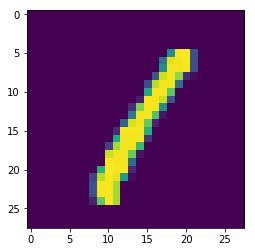

In [29]:
plt.imshow(row_1)

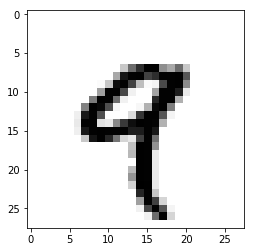

In [31]:
import matplotlib as mpl
import matplotlib.pyplot as plt
some_digit = data[4]
some_digit_image = some_digit.reshape(28,28)
plt.imshow(some_digit_image,cmap=mpl.cm.binary,interpolation="nearest")
plt.savefig('five.png')

## bit.ly/mstp-view

In [32]:
X=mnist['data']
Y=mnist['target']

In [34]:
x_train,x_test,y_train,y_test=X[:60000],X[60000:],Y[:60000],Y[60000:]

In [35]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(x_train,y_train)

C:\Users\APSSDC\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [46]:
accuracy_score(y_test,y_pred)

0.8453

In [37]:
sgd_clf.predict([x_test[0]])

array(['7'], dtype='<U1')

In [38]:
y_test[0]

'7'

In [41]:
y_pred=sgd_clf.predict(x_test)

In [44]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [45]:
confusion_matrix(y_test,y_pred)

array([[ 954,    0,   11,    3,    0,    1,    3,    2,    1,    5],
       [   0, 1128,    5,    0,    0,    1,    1,    0,    0,    0],
       [   5,   24,  939,    9,    7,    0,    8,    8,   22,   10],
       [   4,   11,   69,  836,    1,   23,    2,   10,    7,   47],
       [   1,   13,   12,    2,  767,    0,    9,    3,    3,  172],
       [  15,   14,   34,   33,   11,  658,   12,    8,   45,   62],
       [  14,    5,   51,    2,    5,   10,  868,    0,    1,    2],
       [   1,   18,   27,    2,    6,    0,    2,  855,    1,  116],
       [  12,  106,   58,   20,   12,   58,    4,    8,  487,  209],
       [   7,   13,    9,    5,    5,    1,    1,    4,    3,  961]],
      dtype=int64)

## smsspamcollection

In [5]:
import pandas as pd
df=pd.read_csv('smsspamcollection/SMSSpamcollection',sep='\t',names=['category','sum'])
df.head()

,category,sum
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
documents = {'Hello,how are you!',
            'win money,win from home.',
            'call me now.',
            'Hello,call hello u tomorrow?'}

In [10]:
lower_case_documents = []
for i in documents:
    i = i.lower()
    lower_case_documents.append(i)
print(lower_case_documents)

['hello,how are you!', 'win money,win from home.', 'call me now.', 'hello,call hello u tomorrow?']


In [21]:
doc = []
for sen in lower_case_documents:
    cleaned=[]
    for word in sen.split():
        if word.isalpha():
            cleaned.append(word)
        else:
            cleaned.append(word[:-1])
    doc.append(cleaned)
doc

[['hello,ho', 'are', 'you'],
 ['win', 'money,wi', 'from', 'home'],
 ['call', 'me', 'now'],
 ['hello,cal', 'hello', 'u', 'tomorrow']]

In [22]:
frequency=[]
for li in doc:
    frequency2={}
    for word in li:
        if word in frequency2.keys():
            frequency2[word]+=1
        else:
            frequency2[word]=1
    frequency.append(frequency2)
frequency


[{'hello,ho': 1, 'are': 1, 'you': 1},
 {'win': 1, 'money,wi': 1, 'from': 1, 'home': 1},
 {'call': 1, 'me': 1, 'now': 1},
 {'hello,cal': 1, 'hello': 1, 'u': 1, 'tomorrow': 1}]

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
count_vector = CountVectorizer()

In [27]:
print(count_vector)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)


In [28]:
count_vector.fit(documents)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)